# Apartment Price in Victoria

Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. Determine the best model to predict and redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [0]:
data = pd.read_csv('victoria (2).csv')

In [12]:
data.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


##Exploratory Data Analysis

In [13]:
data.describe()

,row.labels,totalprice,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,109.500000,280741.522936,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,63.075352,69298.460578,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.000000,155000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,55.250000,228500.000000,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,109.500000,269750.000000,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,163.750000,328625.000000,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,218.000000,560000.000000,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


* **Highest Price** of Victoria Apartment is 560 billion
* **Lowest Price** of Victoria Apartment is 155 billion
* **Average Price** of Victoria Apartment is 280 billion



##Data Visualization

### Total Price and Age

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


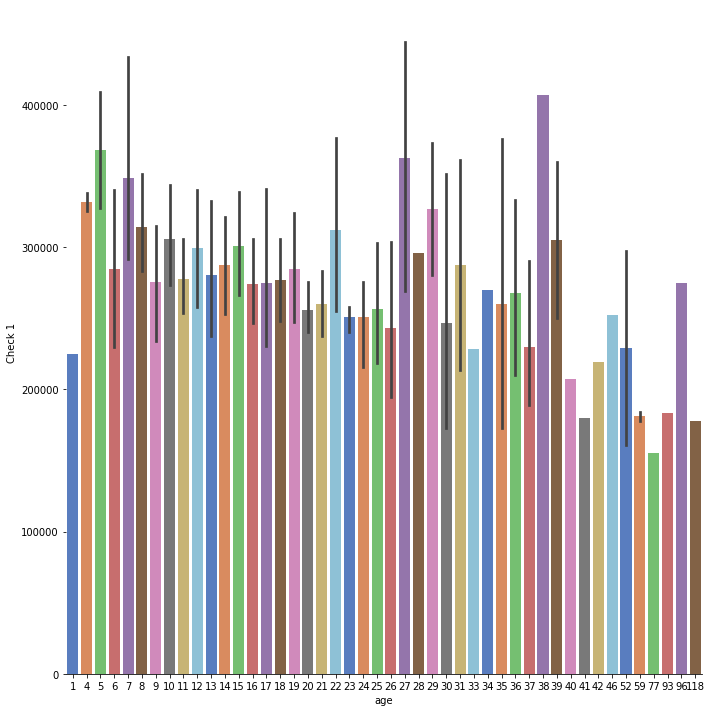

In [24]:
g  = sns.factorplot(x="age",y="totalprice",data=data,kind="bar", size = 10 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Check 1")

Based on that visualization we can see that on age = 38 years old is the customer who have the highest price in rent victoria apartment.

And the lowest price of customers who rent the victoria apartment is on age = 77 years old.

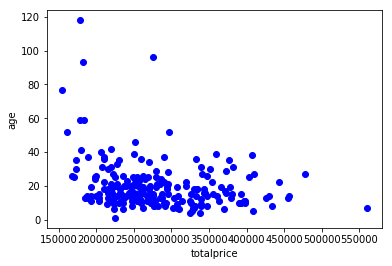

In [0]:
plt.scatter(cdf.totalprice, cdf.age,  color='blue')
plt.xlabel("totalprice")
plt.ylabel("age")
plt.show()

Based on the scatter plot we can see that most of customer who rent the apartment is on age between 10 till 30 years old because the crowded of point in that scatter plot in that age

#### Conclusion
Based on that visuzalization, Tony can targetted the consumer on the age between 10 till 30 and offers the apartment with a highest price on the customer who have an age in 38 years old and the lowest price in 77 years old.

### Price and Floor

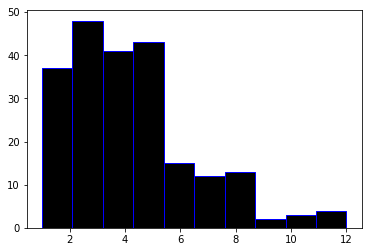

In [47]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(data['floor'], 
         facecolor='black', 
         edgecolor='blue', )
plt.show()

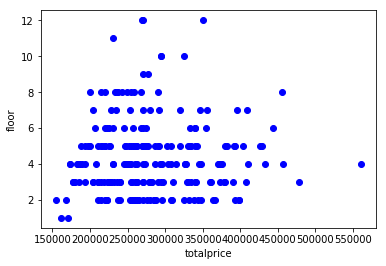

In [49]:
plt.scatter(data.totalprice, data.floor,  color='blue')
plt.xlabel("totalprice")
plt.ylabel("floor")
plt.show()

Based on The visualization, most of customer is like to stay in the third floor of victoria apartment. Maybe because third floor is not too high and have the best view than other floor.

By this information, Tonny needs to improve other floor. So, the customer can stay in the other customer except third floor.

##Variable Selection

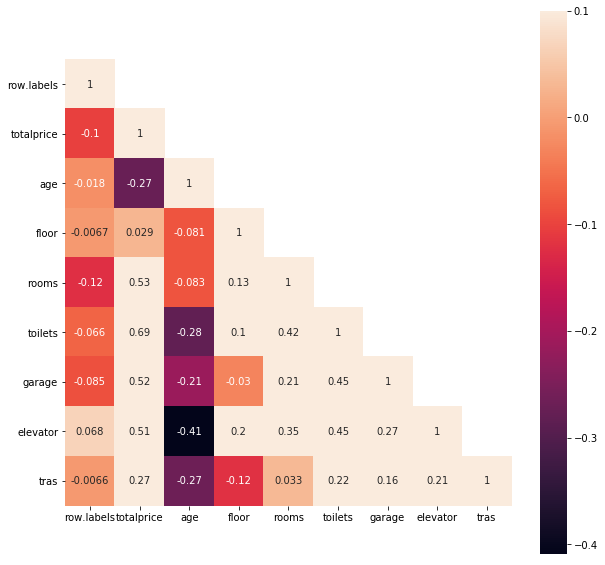

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#create correlation with hitmap

#create correlation
corr = data.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (5,3))
fig.set_size_inches(10,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.1, 
            square = True, 
            annot = True)

Variables totalprice and toilets has the highest correlation. So, the variables that will be choose for the modelling is price and toilets.

Because it related. Customer sometimes choose the best toilets for its completement, cleanless and also the design. So the best toilets can make a better experience. By this information, Tony can improve the victoria apartment better than the last condition to make customer satisfy.

In [29]:
cdf = data[['totalprice','toilets']]
cdf.head(9)

,totalprice,toilets
0,228000,1
1,409000,2
2,200000,2
3,180000,1
4,443600,2
5,173000,1
6,245000,1
7,210000,1
8,188982,1


###Creating Train and Test Dataset

In [0]:
msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

###Train Data Distribution

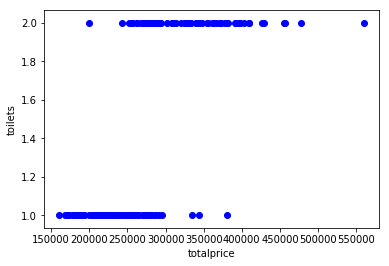

In [32]:
plt.scatter(train.totalprice, train.toilets,  color='blue')
plt.xlabel("totalprice")
plt.ylabel("toilets")
plt.show()

By this visualization, toilets type I is on the lowest price and toilets type II is on the middle price.

So tonny can predict a positioning to make an improvement of apartment toilets.

##Modelling

In [35]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['totalprice']])
train_y = np.asanyarray(train[['toilets']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[4.92262487e-06]]
Intercept:  [0.08117505]


Text(0, 0.5, 'toilets')

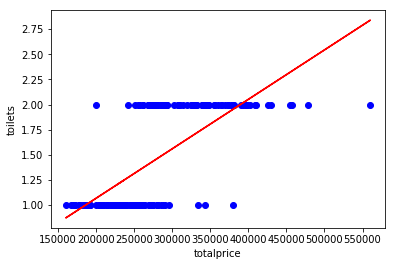

In [37]:
plt.scatter(train.totalprice, train.toilets,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("totalprice")
plt.ylabel("toilets")

##Accuracy on Error

In [39]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['totalprice']])
test_y = np.asanyarray(test[['toilets']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.31
Residual sum of squares (MSE): 0.14
R2-score: -0.31
